In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font',**{'family':'monospace','monospace':['Computer Modern Typewriter']})
rc('text', usetex=True)
import matplotlib
matplotlib.rcParams["text.latex.preamble"].append(r'\usepackage{xfrac}')
%matplotlib inline
import matplotlib.mlab as mlab
from matplotlib.dates import MonthLocator, WeekdayLocator, DateFormatter
import numpy as np
import pandas

Index([u'item_id', u'host', u'wiki_ref_lang', u'wiki_ref_type', u'wikicite',
       u'ref_value', u'stat_id', u'stat_property', u'domain', u'tld'],
      dtype='object')
Total number of matched domains: 1993


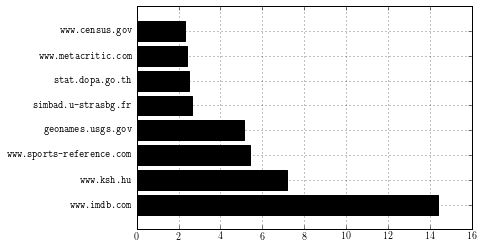

In [2]:
matchingRefs = pandas.read_csv('./matching_host.csv')

domain2occurrence = {}
print matchingRefs.keys()

url2items = {}
url2domain = {}
for refNumber in range (0, len(matchingRefs['ref_value'])):
    if matchingRefs['ref_value'][refNumber] not in url2domain:
        url2domain[matchingRefs['ref_value'][refNumber]] = matchingRefs['host'][refNumber]
    


for refNumber in range (0, len(matchingRefs['ref_value'])):
    if matchingRefs['ref_value'][refNumber] not in url2items:
        url2items[matchingRefs['ref_value'][refNumber]] = [matchingRefs['item_id'][refNumber]]
    elif matchingRefs['item_id'][refNumber] not in url2items[matchingRefs['ref_value'][refNumber]]:
        url2items[matchingRefs['ref_value'][refNumber]].append(matchingRefs['item_id'][refNumber])
    
for url in url2items:
    if url2domain[url] not in domain2occurrence: 
        domain2occurrence[url2domain[url]] = len(url2items[url])
    else:
        domain2occurrence[url2domain[url]] += len(url2items[url])

domains = sorted(domain2occurrence, key=lambda k: domain2occurrence[k], reverse=True)
domains = domains[:8]

total = 0
for domain in domain2occurrence:
    total += domain2occurrence[domain]
print ('Total number of matched domains: %d' % (total))

occurrences = []
for domain in domains:
    
    occurrences.append(domain2occurrence[domain] * 100 / 1993.0)

ax = plt.barh(range(len(occurrences)), occurrences, align='center', color='K')
plt.grid(which='both')
plt.yticks(range(len(occurrences)), domains)

plt.savefig('DomainBar.pdf', format='pdf', bbox_inches='tight')

plt.show()

Index([u'item_id', u'host', u'wiki_ref_lang', u'wiki_ref_type', u'wikicite',
       u'ref_value', u'stat_id', u'stat_property', u'domain', u'tld'],
      dtype='object')
Total number of matched domains: 1993


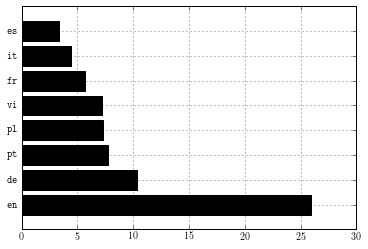

In [3]:
matchingRefs = pandas.read_csv('./matching_host.csv')

domain2occurrence = {}
print matchingRefs.keys()

url2items = {}
url2domain = {}
for refNumber in range (0, len(matchingRefs['ref_value'])):
    if matchingRefs['ref_value'][refNumber] not in url2domain:
        url2domain[matchingRefs['ref_value'][refNumber]] = matchingRefs['wiki_ref_lang'][refNumber]
    


for refNumber in range (0, len(matchingRefs['ref_value'])):
    if matchingRefs['ref_value'][refNumber] not in url2items:
        url2items[matchingRefs['ref_value'][refNumber]] = [matchingRefs['item_id'][refNumber]]
    elif matchingRefs['item_id'][refNumber] not in url2items[matchingRefs['ref_value'][refNumber]]:
        url2items[matchingRefs['ref_value'][refNumber]].append(matchingRefs['item_id'][refNumber])
    
for url in url2items:
    if url2domain[url] not in domain2occurrence: 
        domain2occurrence[url2domain[url]] = len(url2items[url])
    else:
        domain2occurrence[url2domain[url]] += len(url2items[url])

domains = sorted(domain2occurrence, key=lambda k: domain2occurrence[k], reverse=True)
domains = domains[:8]

total = 0
for domain in domain2occurrence:
    total += domain2occurrence[domain]
print ('Total number of matched domains: %d' % (total))

occurrences = []
for domain in domains:
    
    occurrences.append(domain2occurrence[domain] * 100 / 1993.0)

ax = plt.barh(range(len(occurrences)), occurrences, align='center', color='K')
plt.grid(which='both')
plt.yticks(range(len(occurrences)), domains)


plt.savefig('TopDomainBar.pdf', format='pdf', bbox_inches='tight')
plt.show()